In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [3]:
#Create some variables we will be using


output_file = "weather_data.csv"

lat_lngs = []
lat_range = (-90, 90)
lng_range = (-180, 180)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#Create our lat_lngs output and our cities list
lat_lngs = zip(lats, lngs)
cities = []

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities and len(cities) < 550:
        cities.append(city)
        
len(cities)

550

In [4]:
cities[0]

'half moon bay'

In [5]:
#Creating the API loop to create our lists of data we will use
import json

with open('config.json') as f:
    data = json.load(f)
    weather_api_key = data['weather_api_key']

url = "http://api.openweathermap.org/data/2.5/weather?q="
api_key = weather_api_key
units = "imperial"

town = []
latitutde = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
hemisphere = []


for city in cities:
    try:
        query_url = f"{url}{city}&appid={api_key}&units={units}"
        response = requests.get(query_url).json()
        town.append(response['name'])
        latitutde.append(response['coord']["lat"])
        longitude.append(response['coord']["lon"])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        if response['coord']["lat"] > 0:
            hemisphere.append("Northern")
        else:
            hemisphere.append("Southern")

        print(f"Record {cities.index(city) + 1} found! | {response['name']}")
    except Exception as ex:
        print(f"Record {cities.index(city) + 1} not found.")
        pass


Record 1 found! | Half Moon Bay
Record 2 found! | Nikolskoye
Record 3 found! | Torbay
Record 4 not found.
Record 5 found! | Peniche
Record 6 not found.
Record 7 found! | Novy Urengoy
Record 8 found! | Severo-Kuril'sk
Record 9 found! | Poltavka
Record 10 found! | Butaritari
Record 11 found! | Atuona
Record 12 found! | Hermanus
Record 13 found! | Praia
Record 14 found! | Bambous Virieux
Record 15 found! | Jamestown
Record 16 found! | Pacific Grove
Record 17 found! | Punta Arenas
Record 18 found! | Lebu
Record 19 found! | Miracema do Tocantins
Record 20 found! | Saldanha
Record 21 found! | Mgachi
Record 22 not found.
Record 23 found! | Penha
Record 24 found! | Saskylakh
Record 25 found! | Kapaa
Record 26 found! | Vyartsilya
Record 27 found! | Coffs Harbour
Record 28 found! | Rikitea
Record 29 found! | Edirne
Record 30 found! | Mataura
Record 31 found! | Barrow
Record 32 found! | Nanortalik
Record 33 found! | Pitimbu
Record 34 found! | Tazovsky
Record 35 not found.
Record 36 found! | Kalmu

Record 288 found! | Gimli
Record 289 found! | Viedma
Record 290 found! | La Sarre
Record 291 found! | Miranda
Record 292 found! | Körfez
Record 293 found! | Zaria
Record 294 not found.
Record 295 found! | Turukhansk
Record 296 not found.
Record 297 found! | Lata
Record 298 found! | Kaithal
Record 299 found! | Makakilo City
Record 300 found! | Laas
Record 301 found! | Roald
Record 302 found! | Wajir
Record 303 found! | Gáldar
Record 304 found! | Tual
Record 305 found! | Zhanakorgan
Record 306 found! | Malakanagiri
Record 307 found! | Port-Gentil
Record 308 found! | Tigil'
Record 309 found! | Deer Lake
Record 310 found! | Evensk
Record 311 found! | Mercedes
Record 312 found! | Belmonte
Record 313 found! | Avera
Record 314 found! | Riachão das Neves
Record 315 found! | Necochea
Record 316 found! | Ende
Record 317 found! | Galesong
Record 318 not found.
Record 319 found! | Puerto Varas
Record 320 found! | Talnakh
Record 321 found! | Tagajo
Record 322 found! | Kribi
Record 323 found! | São 

In [6]:
#Create a dataframe of our data
dict = {"City": town, "Latitude": latitutde, "Longitude": longitude, "Temperature": temperature, "Humidity": humidity, "Cloudiness": cloudiness, "Wind_Speed": wind_speed, "Hemisphere": hemisphere}
weather_data = pd.DataFrame(dict)

#Save data to a .csv
weather_data.to_csv(output_file, encoding='utf-8', index=False)

weather_data.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed,Hemisphere
0,Half Moon Bay,37.4636,-122.4286,57.78,71,1,3.44,Northern
1,Nikolskoye,59.7035,30.7861,45.10,87,90,6.71,Northern
2,Torbay,47.6666,-52.7314,31.28,64,75,28.77,Northern
3,Peniche,39.3558,-9.3811,72.00,56,92,11.99,Northern
4,Novy Urengoy,66.0833,76.6333,-22.99,99,5,6.38,Northern


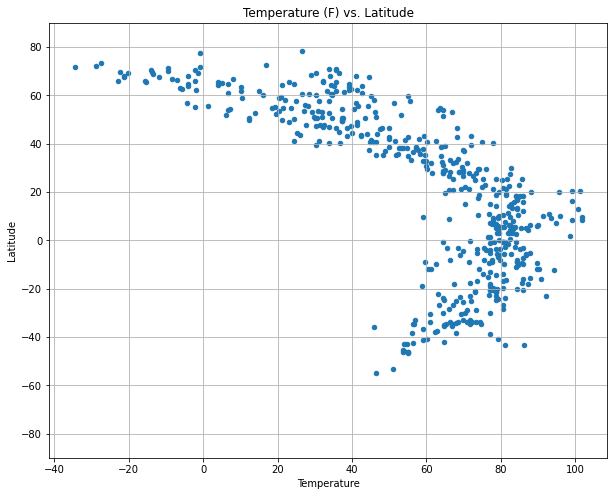

In [7]:
#Create the scatter plot comparisons and save to png file

weather_data.plot(kind="scatter", x="Temperature", y="Latitude", ylim=(-90, 90), grid=True, figsize=(10,8), title="Temperature (F) vs. Latitude")

plt.savefig('temp_lat.png')

#This code is taking the temperature(f) of our 505 randomly selected cities as the x-axis and latitude as the y-axis. It shows the increase in temperatures around the 0 latitude equator. The y-limits are set to 90 and -90, so these charts also shows the higher number of cities and distance from equator in the Northern hemisphere.

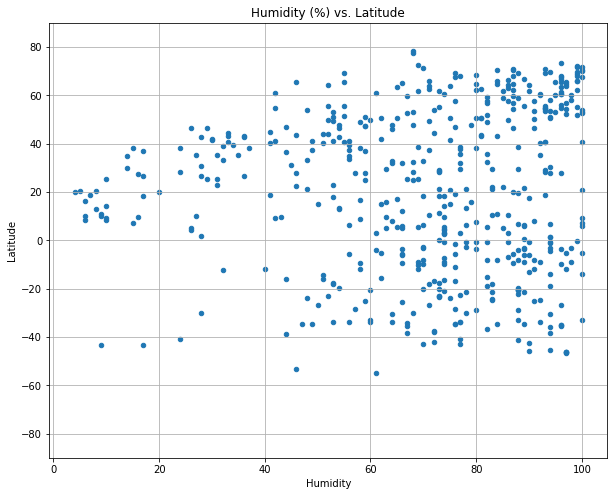

In [8]:
weather_data.plot(kind="scatter", x="Humidity", y="Latitude", ylim=(-90, 90), grid=True, figsize=(10,8), title="Humidity (%) vs. Latitude")

plt.savefig('humid_lat.png')

#This code is taking the humidity percentage number of our 505 randomly selected cities as the x-axis and latitude as the y-axis. It shows a slight correlation for distance from equator and humidity levels at this point in the year. It also shows humidity levels above about 75 for most cities. 

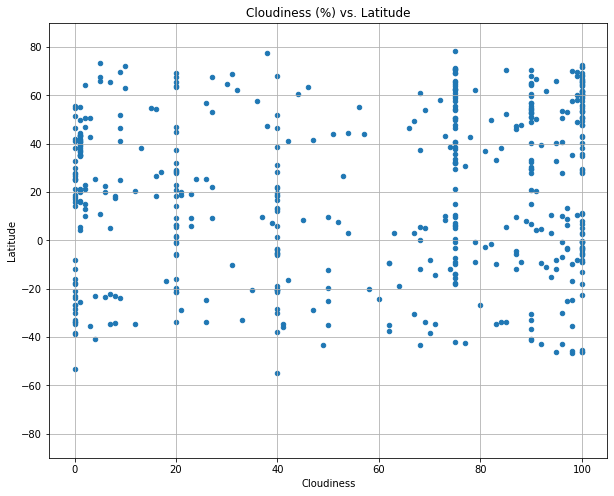

In [9]:
weather_data.plot(kind="scatter", x="Cloudiness", y="Latitude", ylim=(-90, 90), grid=True, figsize=(10,8), title="Cloudiness (%) vs. Latitude")

plt.savefig('cloudiness_lat.png')

#This code is taking the cloudiness percentage number of our 505 randomly selected cities as the x-axis and latitude as the y-axis. It shows a pretty even distribution of cloudiness levels up and down the different latitudes.

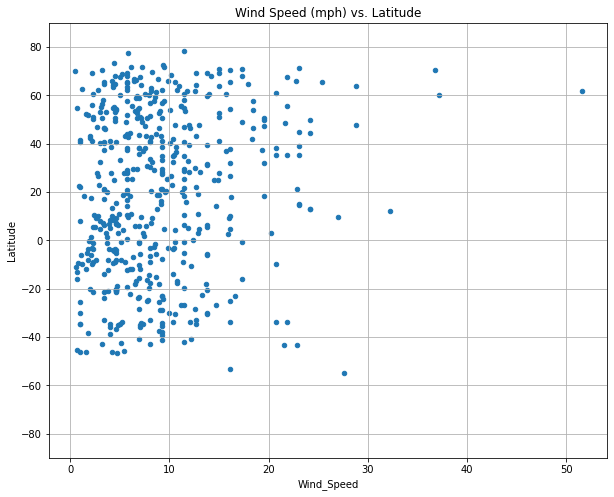

In [10]:
weather_data.plot(kind="scatter", x="Wind_Speed", y="Latitude", ylim=(-90, 90), grid=True, figsize=(10,8), title="Wind Speed (mph) vs. Latitude")

plt.savefig('wind_lat.png')

#This code is taking the wind speed of our 505 randomly selected cities as the x-axis and latitude as the y-axis. It shows a pretty even distribution of wind speed up and down the different latitudes. There are a few high wind cities in the northern hemisphere that may be outliers. It could be because of weather patterns, mountain ranges, or just more samples in the northern hemisphere.

In [11]:
#Create the Norhtern and Southern Hemisphere df
weather_data_nh = weather_data.loc[weather_data['Hemisphere'] == 'Northern']
weather_data_sh = weather_data.loc[weather_data['Hemisphere'] == 'Southern']
weather_data_nh.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed,Hemisphere
0,Half Moon Bay,37.4636,-122.4286,57.78,71,1,3.44,Northern
1,Nikolskoye,59.7035,30.7861,45.10,87,90,6.71,Northern
2,Torbay,47.6666,-52.7314,31.28,64,75,28.77,Northern
3,Peniche,39.3558,-9.3811,72.00,56,92,11.99,Northern
4,Novy Urengoy,66.0833,76.6333,-22.99,99,5,6.38,Northern


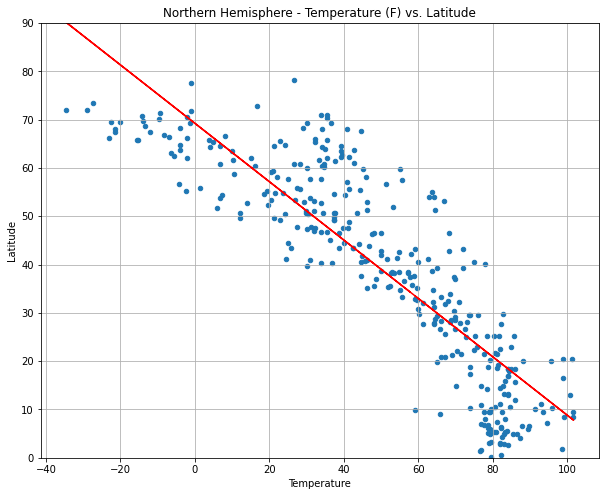

The r-value is: -0.8721
y = -0.6x + 69.24


In [12]:
#Plot the scatters again

(slope, intercept, r_value, p_value, std_err) = linregress(weather_data_nh["Temperature"], weather_data_nh["Latitude"])
weather_data_nh.plot(kind="scatter", x="Temperature", y="Latitude", ylim=(0, 90), grid=True, figsize=(10,8), title="Northern Hemisphere - Temperature (F) vs. Latitude")
x_values = weather_data_nh["Temperature"]
lr = (slope*x_values) + intercept
plt.plot(x_values, lr, color="red")

plt.savefig('Norhtern_temp.png')
plt.show()
print(f"The r-value is: {round(r_value,4)}")
print(f"y = {round(slope,2)}x + {round(intercept, 2)}")



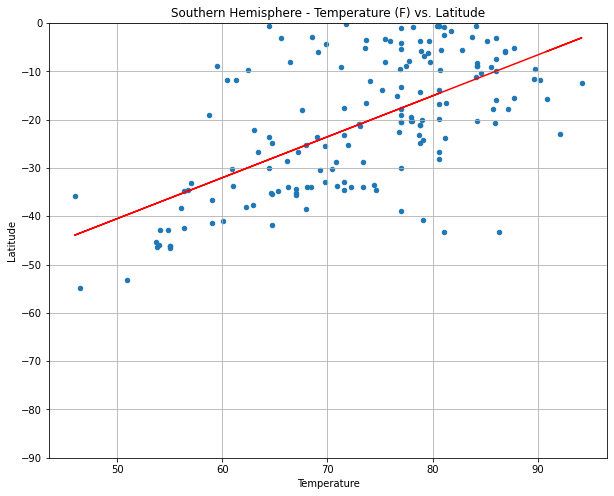

The r-value is: 0.6237
y = 0.85x + -82.81


In [13]:
(slope, intercept, r_value, p_value, std_err) = linregress(weather_data_sh["Temperature"], weather_data_sh["Latitude"])
weather_data_sh.plot(kind="scatter", x="Temperature", y="Latitude", ylim=(-90, 0), grid=True, figsize=(10,8), title="Southern Hemisphere - Temperature (F) vs. Latitude")
x_values = weather_data_sh["Temperature"]
lr = (slope*x_values) + intercept
plt.plot(x_values, lr, color="red")

plt.savefig('Southern_temp.png')
plt.show()
print(f"The r-value is: {round(r_value,4)}")
print(f"y = {round(slope,2)}x + {round(intercept, 2)}")



#The two temperature charts have a strong relationship, as illustrated by the r value. The linear regression slope correlates with the data displayed. We can safely say temperature is higher the closer the latitude is to 0.

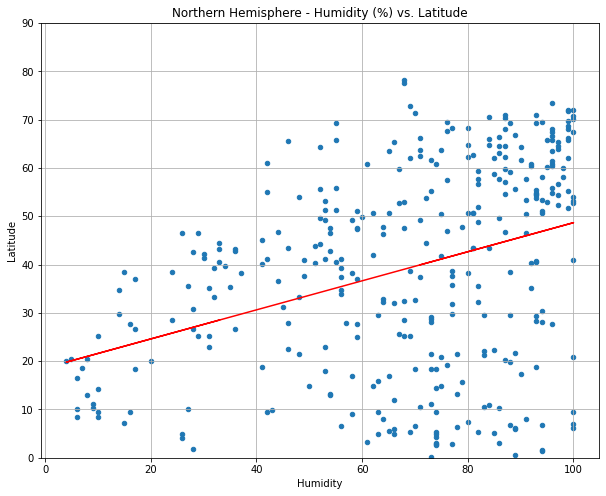

The r-value is: 0.3597
y = 0.3x + 18.58


In [14]:
(slope, intercept, r_value, p_value, std_err) = linregress(weather_data_nh["Humidity"], weather_data_nh["Latitude"])
weather_data_nh.plot(kind="scatter", x="Humidity", y="Latitude", ylim=(0, 90), grid=True, figsize=(10,8), title="Northern Hemisphere - Humidity (%) vs. Latitude")
x_values = weather_data_nh["Humidity"]
lr = (slope*x_values) + intercept
plt.plot(x_values, lr, color="red")

plt.savefig('Northern_humid.png')
plt.show()
print(f"The r-value is: {round(r_value,4)}")
print(f"y = {round(slope,2)}x + {round(intercept, 2)}")



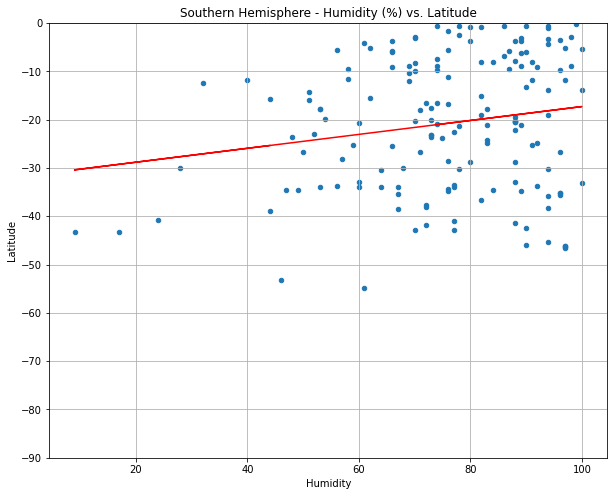

The r-value is: 0.1815
y = 0.14x + -31.71


In [15]:
(slope, intercept, r_value, p_value, std_err) = linregress(weather_data_sh["Humidity"], weather_data_sh["Latitude"])
weather_data_sh.plot(kind="scatter", x="Humidity", y="Latitude", ylim=(-90, 0), grid=True, figsize=(10,8), title="Southern Hemisphere - Humidity (%) vs. Latitude")
x_values = weather_data_sh["Humidity"]
lr = (slope*x_values) + intercept
plt.plot(x_values, lr, color="red")

plt.savefig('Southern_humid_lat.png')
plt.show()
print(f"The r-value is: {round(r_value,4)}")
print(f"y = {round(slope,2)}x + {round(intercept, 2)}")



Humidity seems to have a slight relationship with latitude, as illustrated by the r-values. It  is stronger in the northern hemisphere. This could be due to more cities in the northern hemisphere, or because cities are more spread out by latitude in the northern.

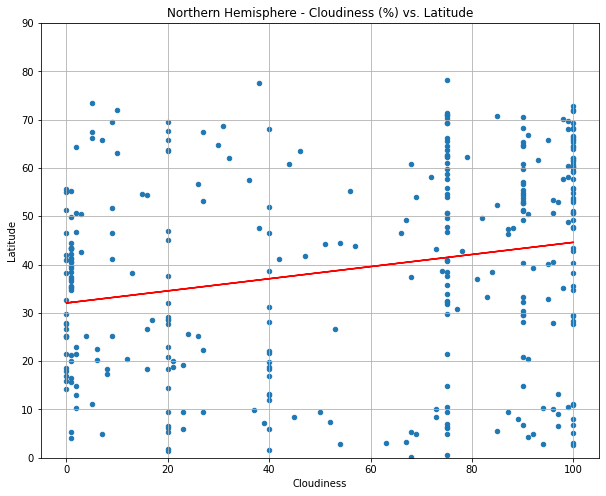

The r-value is: 0.2273
y = 0.13x + 32.03


In [16]:
(slope, intercept, r_value, p_value, std_err) = linregress(weather_data_nh["Cloudiness"], weather_data_nh["Latitude"])
weather_data_nh.plot(kind="scatter", x="Cloudiness", y="Latitude", ylim=(0, 90), grid=True, figsize=(10,8), title="Northern Hemisphere - Cloudiness (%) vs. Latitude")
x_values = weather_data_nh["Cloudiness"]
lr = (slope*x_values) + intercept
plt.plot(x_values, lr, color="red")

plt.savefig('Northern_cloudiness.png')
plt.show()
print(f"The r-value is: {round(r_value,4)}")
print(f"y = {round(slope,2)}x + {round(intercept, 2)}")



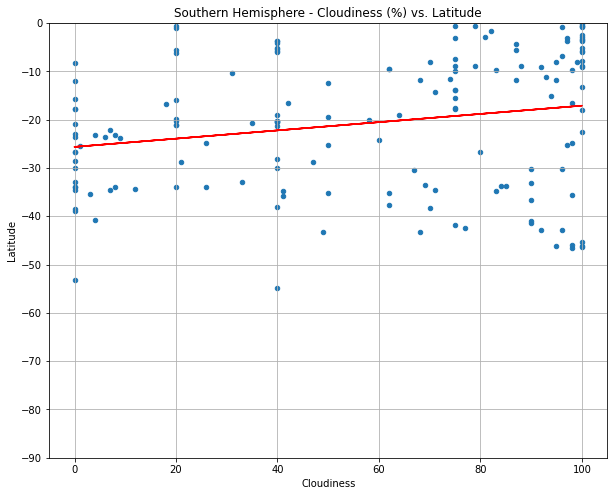

The r-value is: 0.2212
y = 0.09x + -25.65


In [17]:
(slope, intercept, r_value, p_value, std_err) = linregress(weather_data_sh["Cloudiness"], weather_data_sh["Latitude"])
weather_data_sh.plot(kind="scatter", x="Cloudiness", y="Latitude", ylim=(-90, 0), grid=True, figsize=(10,8), title="Southern Hemisphere - Cloudiness (%) vs. Latitude")
x_values = weather_data_sh["Cloudiness"]
lr = (slope*x_values) + intercept
plt.plot(x_values, lr, color="red")

plt.savefig('Southern_cloudiness.png')
plt.show()
print(f"The r-value is: {round(r_value,4)}")
print(f"y = {round(slope,2)}x + {round(intercept, 2)}")



Cloudiness does not seem to have a relationship with latitude. The r-value is very close to 0, and the slope is pretty flat.

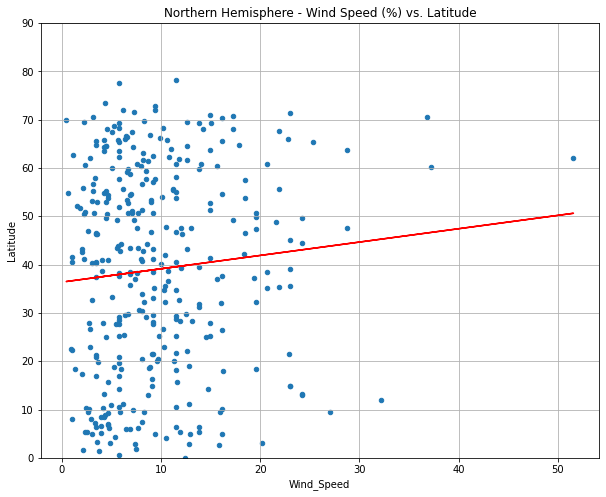

The r-value is: 0.0878
y = 0.28x + 36.38


In [18]:
(slope, intercept, r_value, p_value, std_err) = linregress(weather_data_nh["Wind_Speed"], weather_data_nh["Latitude"])
weather_data_nh.plot(kind="scatter", x="Wind_Speed", y="Latitude", ylim=(0, 90), grid=True, figsize=(10,8), title="Northern Hemisphere - Wind Speed (%) vs. Latitude")
x_values = weather_data_nh["Wind_Speed"]
lr = (slope*x_values) + intercept
plt.plot(x_values, lr, color="red")

plt.savefig('Northern_wind.png')
plt.show()
print(f"The r-value is: {round(r_value,4)}")
print(f"y = {round(slope,2)}x + {round(intercept, 2)}")



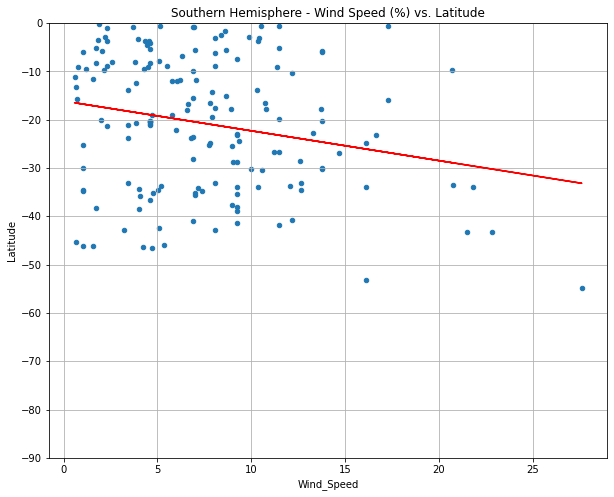

The r-value is: -0.2224
y = -0.62x + -16.14


In [19]:
(slope, intercept, r_value, p_value, std_err) = linregress(weather_data_sh["Wind_Speed"], weather_data_sh["Latitude"])
weather_data_sh.plot(kind="scatter", x="Wind_Speed", y="Latitude", ylim=(-90, 0), grid=True, figsize=(10,8), title="Southern Hemisphere - Wind Speed (%) vs. Latitude")
x_values = weather_data_sh["Wind_Speed"]
lr = (slope*x_values) + intercept
plt.plot(x_values, lr, color="red")

plt.savefig('Southern_wind.png')
plt.show()
print(f"The r-value is: {round(r_value,4)}")
print(f"y = {round(slope,2)}x + {round(intercept, 2)}")



Wind speed has a slight relationship with latitude, but the r-values are close to zero. This could be due to elevation changes close to the equator, or due to jet streams and climates further from the equator. Again, the northenr hemisphere is more spread out and has more cities than the southern.